In [2]:
from pathlib import Path
import numpy as np
import os, shutil
import matplotlib.pyplot as plt

from PIL import Image

from tqdm.auto import tqdm

import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torchsummary import summary
from torch.utils.data.dataset import Subset
from torch import nn

# Download and extract the data

In [3]:
# import urllib.request
# urllib.request.urlretrieve("https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz",
#                            "carpet.tar.xz")

# import tarfile

# with tarfile.open('carpet.tar.xz') as f:
#     f.extractall('.')


# "bottle": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937370-1629951468/bottle.tar.xz",
# "cable": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937413-1629951498/cable.tar.xz",
# "capsule": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937454-1629951595/capsule.tar.xz",
# "carpet": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz",
# "grid": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937487-1629951814/grid.tar.xz",
# "hazelnut": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937545-1629951845/hazelnut.tar.xz",
# "leather": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937607-1629951964/leather.tar.xz",
# "metal_nut": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937637-1629952063/metal_nut.tar.xz",
# "pill": "https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz",
# "screw": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938130-1629953152/screw.tar.xz",
# "tile": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938133-1629953189/tile.tar.xz",
# "toothbrush": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938134-1629953256/toothbrush.tar.xz",
# "transistor": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938166-1629953277/transistor.tar.xz",
# "wood": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938383-1629953354/wood.tar.xz",
# "zipper": "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938385-1629953449/zipper.tar.xz"


# Visualize some samples

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = 'carpet/test/hole/000.png'
image = Image.open(image_path)


(1024, 1024)

torch.Size([3, 224, 224])


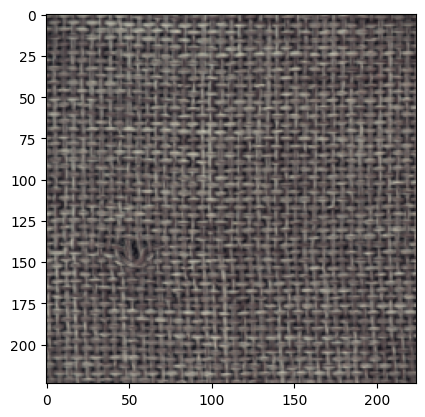

In [14]:
from torchvision.transforms import transforms
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])


image = transform(image)
print(image.shape)

plt.imshow(image.permute(1, 2, 0))
plt.show()


In [15]:
from torchvision.datasets import ImageFolder

train_image_path = 'carpet/train'
# Load the train dataset
good_dataset = ImageFolder(root=train_image_path, transform=transform)


x,y = good_dataset[0]
print(x.shape,y)

torch.Size([3, 224, 224]) 0


# Train test split for the autoencoder

In [23]:
train_dataset, test_dataset = torch.utils.data.random_split(good_dataset, [0.8, 0.2])

print(len(good_dataset), len(train_dataset), len(test_dataset))

280 224 56


## Using dataloader for efficient data loading during training

In [24]:
BS=16

train_loader = DataLoader(train_dataset, batch_size=BS, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BS, shuffle=True)

image_batch = next(iter(train_loader))

print(f'shape of input {image_batch[0].shape} and labels {image_batch[1].shape}')

shape of input torch.Size([16, 3, 224, 224]) and labels torch.Size([16])


In [28]:
grid.shape

torch.Size([3, 226, 1126])

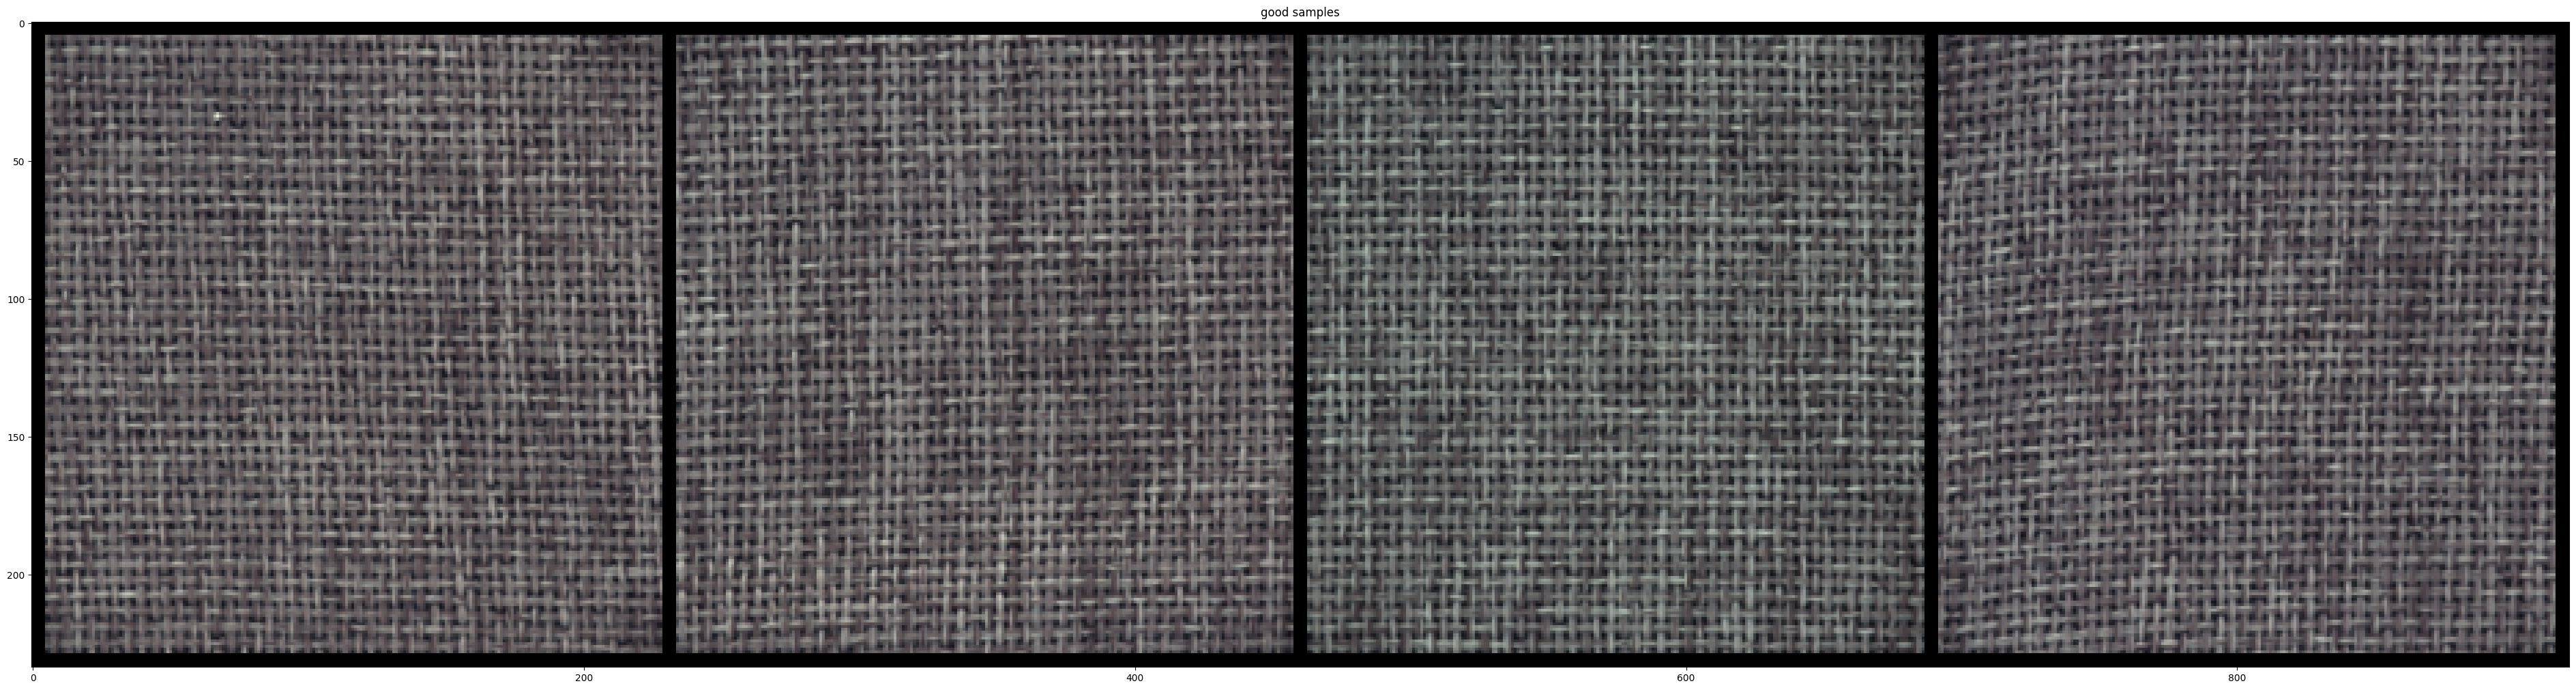

In [30]:
plt.figure(figsize=(12*4,48*4))
grid = torchvision.utils.make_grid(image_batch[0][0:4],padding=5, nrow=4)
plt.imshow(grid.permute(1, 2, 0))
plt.title('good samples')
plt.show()

# Train autoencoder model

torch.Size([3, 224, 224])


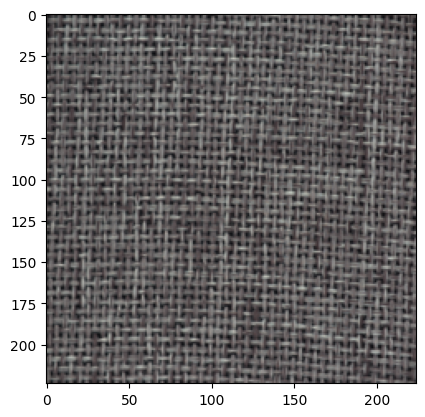

torch.Size([1, 128, 221, 221])
torch.Size([1, 128, 110, 110])
torch.Size([1, 256, 53, 53])
torch.Size([1, 256, 25, 25])
torch.Size([1, 256, 53, 53])
torch.Size([1, 128, 110, 110])
torch.Size([1, 3, 224, 224])


In [71]:
import torch.nn.functional as F
from torch import nn


input_image = Image.open(r'F:\mvtec_anomalydetection\carpet\train\good\000.png')
input_image = transform(input_image) # resizes the image, converts to a tensor 
print(input_image.shape)
# plt.imshow(input_image.permute(1,2,0))
# plt.show()

# input_image = input_image.unsqueeze(0) # adds an extra dimension (represnting batch size)

# c1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=4)
# x = c1(input_image)
# print(x.shape)
# ap1 = nn.AvgPool2d(kernel_size=2, stride=2 )
# x = ap1(x)
# print(x.shape)
# c2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4)
# ap2 = nn.AvgPool2d(kernel_size=2, stride=2 )
# x= ap2(c2(x))
# print(x.shape)
# c3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3 )
# ap3 = nn.AvgPool2d(kernel_size=2, stride=2 )
# x = ap3(c3(x))
# print(x.shape)

# c4 = nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=4, stride=2, output_padding=1 )
# x = c4(x)
# print(x.shape)

# c5 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=5, stride=2, output_padding=1 )
# x = c5(x)
# print(x.shape)
# c6 = nn.ConvTranspose2d(in_channels=128, out_channels=3, kernel_size=5, stride=2, output_padding=1 )
# x = c6(x)
# print(x.shape)

In [74]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=4),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=4),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 256, kernel_size=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 256, kernel_size=4, stride=2, output_padding=1 ),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=5, stride=2, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 3, kernel_size=5, stride=2, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Test the autoencoder architecture
model = Autoencoder()
input_image = torch.randn(1, 3, 224, 224)  # Sample input image
output_image = model(input_image)
print(output_image.shape)  # Print the shape of the output image


torch.Size([1, 3, 224, 224])


In [10]:
# ckpoints = torch.load('conv_autoencoder.pth')
# model.load_state_dict(ckpoints)

In [75]:
# Define the loss function and optimizer

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)

In [77]:
# Define a list to store training loss and validation loss
Loss = []
Validation_Loss = []

model.cuda()

num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    model.train()  # Set model to training mode
    for img, _ in train_loader:
        img = img.cuda()
        
        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad() #clears the gradients of all optimized tensors.  This step is necessary because gradients are accumulated by default in PyTorch, and we want to compute fresh gradients for the current batch of data.
        loss.backward() # This line computes the gradients of the loss function with respect to the model parameters. These gradients are used to update the model parameters during optimization.
        optimizer.step() # This line updates the model parameters using the computed gradients. 
    Loss.append(loss.item())
       

    # Calculate validation loss
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_loss_sum = 0.0
        num_batches = 0
        for img, _ in test_loader:
            img = img.cuda()
            output = model(img)
            val_loss = criterion(output, img)
            val_loss_sum += val_loss.item()
            num_batches += 1
        val_loss_avg = val_loss_sum / num_batches
        Validation_Loss.append(val_loss_avg)
    
    if epoch % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item(), val_loss_avg))

plt.plot(Loss, label='Training Loss')
plt.plot(Validation_Loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Loss: 0.0153, Validation Loss: 0.0146
Epoch [6/100], Loss: 0.0124, Validation Loss: 0.0122
Epoch [11/100], Loss: 0.0093, Validation Loss: 0.0099
Epoch [16/100], Loss: 0.0063, Validation Loss: 0.0062
Epoch [21/100], Loss: 0.0055, Validation Loss: 0.0054
Epoch [26/100], Loss: 0.0052, Validation Loss: 0.0049
Epoch [31/100], Loss: 0.0046, Validation Loss: 0.0047
Epoch [36/100], Loss: 0.0045, Validation Loss: 0.0045
Epoch [41/100], Loss: 0.0042, Validation Loss: 0.0044
Epoch [46/100], Loss: 0.0046, Validation Loss: 0.0045
Epoch [51/100], Loss: 0.0042, Validation Loss: 0.0041
Epoch [56/100], Loss: 0.0042, Validation Loss: 0.0040


KeyboardInterrupt: 

In [78]:
# Save the model
torch.save(model.state_dict(), 'simple_autoencoder_l2_loss.pth')
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 256, kernel_size=(4, 4), stride=(2, 2), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(128, 3, kernel_size=(5, 5), stride=(2, 2), output_padding=(1, 1))
    (5): Sigmoid()
  )
)

## Reconstruction of good images

<Figure size 1600x1200 with 0 Axes>

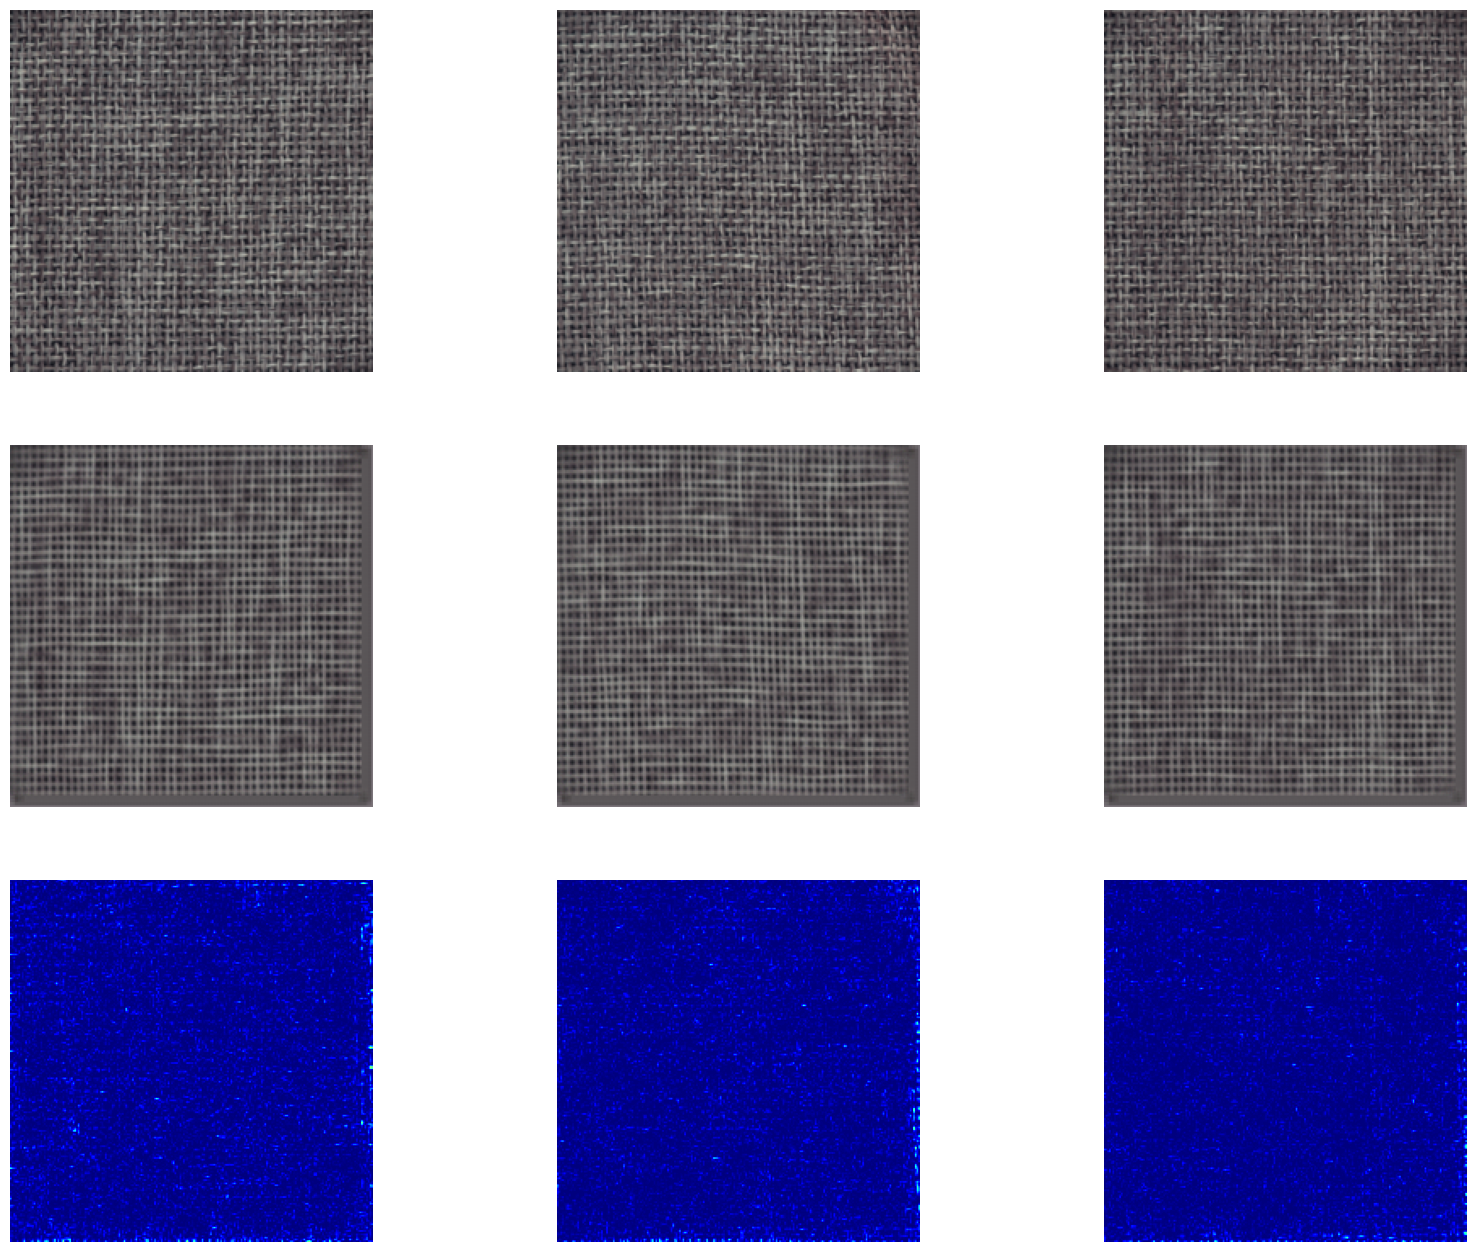

In [79]:
with torch.no_grad():
    for data, _ in train_loader:
        data = data.cuda()
        recon = model(data)
        break

recon_error =  ((data-recon)**2).mean(axis=1)
    
plt.figure(dpi=250)
fig, ax = plt.subplots(3, 3, figsize=(5*4, 4*4))
for i in range(3):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[2, i].imshow(recon_error[i][5:-5,5:-5].cpu().numpy(), cmap='jet',vmax= torch.max(recon_error[i]))
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
    ax[2, i].axis('OFF')
plt.show()

## Reconstruction of bad images

# Obtain the fault detection HEATMAP using AE

<Figure size 1600x1200 with 0 Axes>

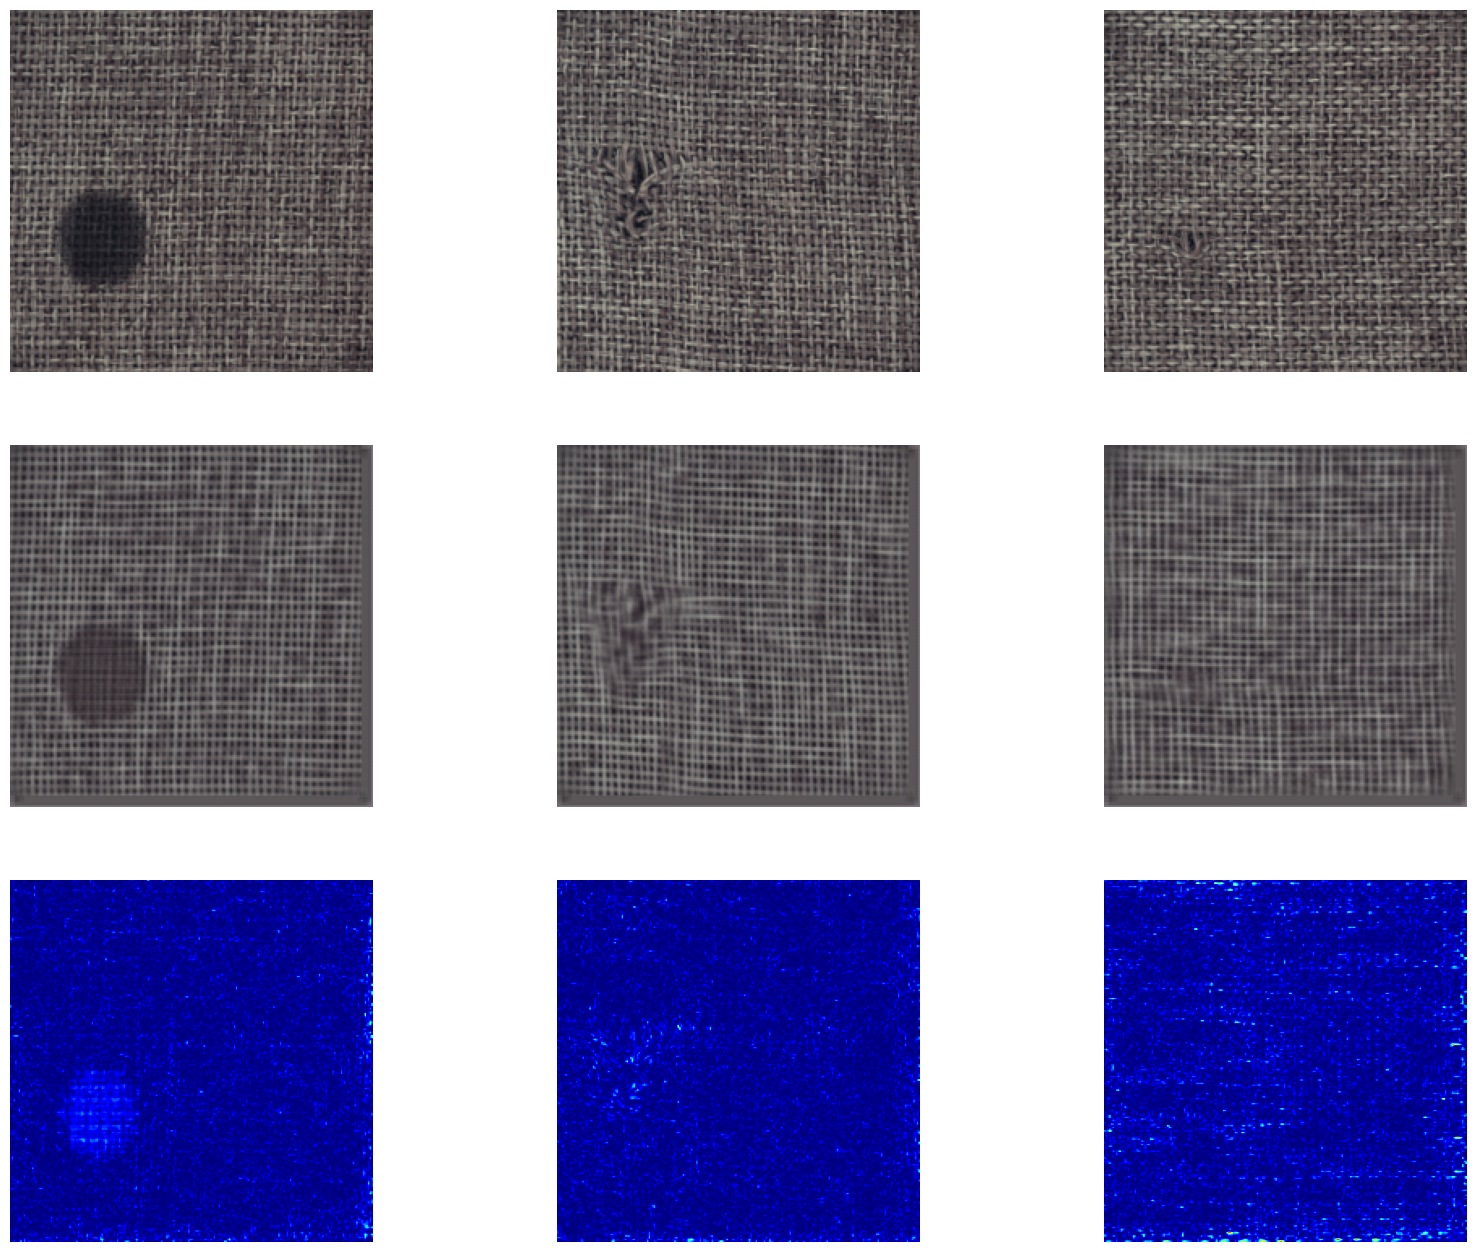

In [80]:
test_image_1 = transform(Image.open(r'F:\mvtec_anomalydetection\carpet\test\color\000.png'))
test_image_2 = transform(Image.open(r'F:\mvtec_anomalydetection\carpet\test\cut\000.png'))
test_image_3 = transform(Image.open(r'F:\mvtec_anomalydetection\carpet\test\hole\000.png'))

data = torch.stack([test_image_1,test_image_2, test_image_3])

with torch.no_grad():
    data = data.cuda()
    recon = model(data)
    
recon_error =  ((data-recon)**2).mean(axis=1)
    
plt.figure(dpi=250)
fig, ax = plt.subplots(3, 3, figsize=(5*4, 4*4))
for i in range(3):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[2, i].imshow(recon_error[i][5:-5,5:-5].cpu().numpy(), cmap='jet',vmax= torch.max(recon_error[i]))
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
    ax[2, i].axis('OFF')
plt.show()


# Obtain the fault detection accuracy

In [20]:
((data-recon)**2).mean(axis=(1,)).shape

torch.Size([3, 224, 224])

In [81]:
RECON_ERROR=[]
with torch.no_grad():
    for data, _ in train_loader:
        data = data.cuda()
        recon = model(data)
        data_recon_squared_mean =  ((data-recon)**2).mean(axis=(1))[:,5:-5,5:-5].mean(axis=(1,2))
        
        RECON_ERROR.append(data_recon_squared_mean)
        
RECON_ERROR = torch.cat(RECON_ERROR).cpu().numpy()

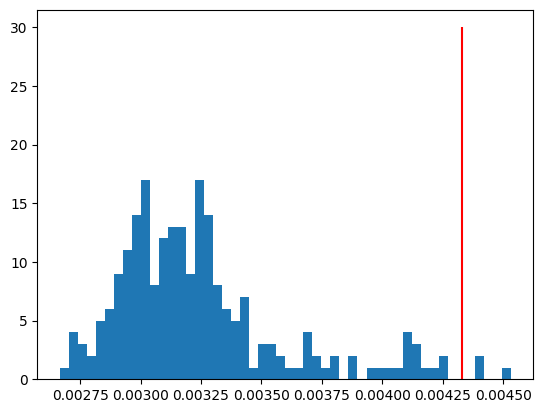

In [82]:
best_threshold = np.mean(RECON_ERROR) + 3 * np.std(RECON_ERROR)

plt.hist(RECON_ERROR,bins=50)
plt.vlines(x=best_threshold,ymin=0,ymax=30,color='r') 
plt.show()

In [86]:
y_true=[]
y_pred=[]
y_score=[]

model.eval()

with torch.no_grad():

    test_path = Path('carpet/test')

    for path in test_path.glob('*/*.png'):
        fault_type = path.parts[-2]
        # if fault_type != 'good':
        test_image = transform(Image.open(path)).cuda().unsqueeze(0)
        recon_image = model(test_image)
        
        # y_score_image = 
        y_score_image =  ((test_image - recon_image)**2).mean(axis=(1))[:,5:-5,5:-5].mean()
    
        y_pred_image = 1*(y_score_image >= best_threshold)
        
        y_true_image = 0 if fault_type == 'good' else 1
        
        y_true.append(y_true_image)
        y_pred.append(y_pred_image.cpu())
        y_score.append(y_score_image.cpu())
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)
    

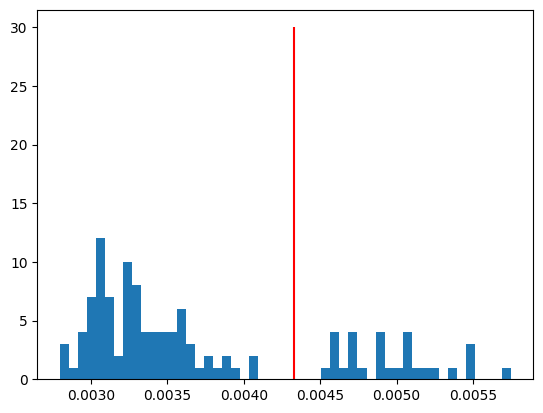

In [87]:
plt.hist(y_score,bins=50)
plt.vlines(x=best_threshold,ymin=0,ymax=30,color='r')
plt.show()

AUC-ROC Score: 0.4141252006420546


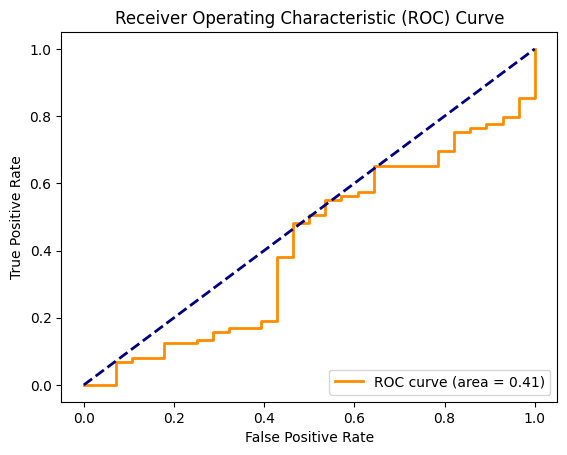

best_threshold = 0.004330789233790711


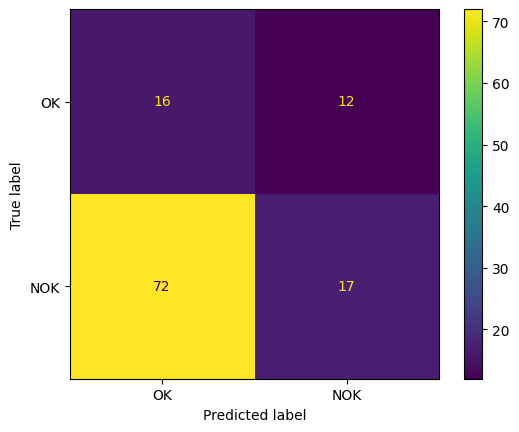

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score
import seaborn as sns



# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_true, y_score)
print("AUC-ROC Score:", auc_roc_score)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# f1_scores = [f1_score(y_true, y_score >= threshold) for threshold in thresholds]

# Select the best threshold based on F1 score
# best_threshold = thresholds[np.argmax(f1_scores)]

print(f'best_threshold = {best_threshold}')

# Generate confusion matrix
cm = confusion_matrix(y_true, (y_score >= best_threshold).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['OK','NOK'])
disp.plot()
plt.show()
